In [44]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html
""" Examples of reading text data and performing clustering K-means
"""
from __future__ import print_function

#import sklearn
import pandas as pd
import numpy as np 

from collections import Counter
import random 
from nltk.tokenize import word_tokenize

#vis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk, sklearn
from sklearn.datasets import load_files
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import logging
from optparse import OptionParser
import sys, datetime
from time import time

#spacy
import spacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")
from nltk.corpus import stopwords 
import textwrap
stops = set(stopwords.words('english'))


time1 =datetime.datetime.now()

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")
op.add_option("-f")
print(__doc__)
op.print_help()

(opts, args) = op.parse_args()
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Examples of reading text data and performing clustering K-means

Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.
  -f F                  


['Security Alert  for connectivity from AWS account owned by Databricks', 'Cluster crash weekly', 'Trying to connect MicroStrategy iserver DB connection to Databricks', 'Databricks Shard Upgrade 3.60 Support!', 'genie 2202170030002112  ARR | 2202280060001228 | RCA | Job that was triggered by Data Factory failed due to cluster inactivity  ', 'After purging cluster logs, there is no significant change in size. What are the other items that constitute the storage?', 'Genie: J&J ||  2202280040003799 || Job fails with Synapse intermittent issue', 'Genie: J&J || 2202280040003799 || Job fails', '2201250060001153 2202240030000948', 'ARR followup - 00132690']
Extracting features from the training dataset using a sparse vectorizer

 Stemmed version
done in 0.552756s
n_samples: 6588, n_features: 2111



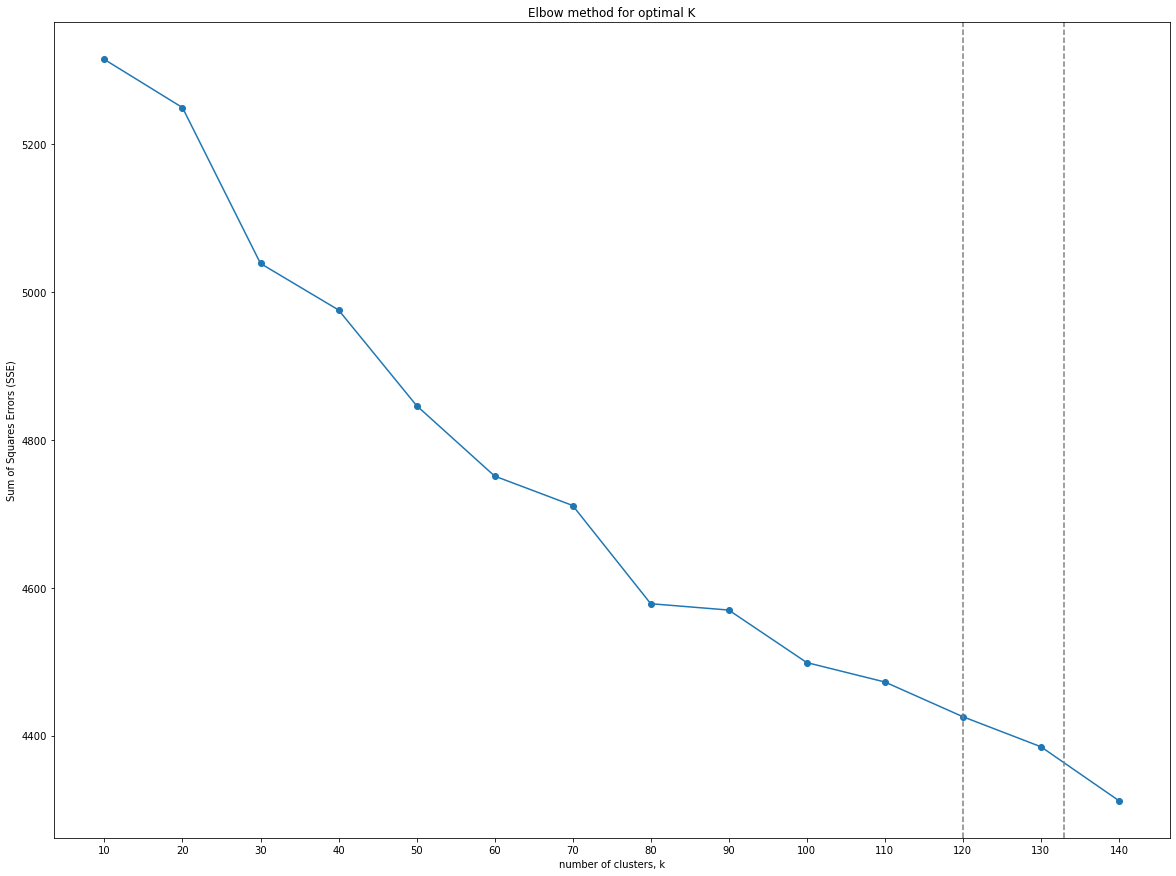

For n_clusters = 70 The average   silhoutte_score is : 0.13939112093002415
For n_clusters = 80 The average   silhoutte_score is : 0.14036130349981993
For n_clusters = 90 The average   silhoutte_score is : 0.1473148887892051
For n_clusters = 100 The average   silhoutte_score is : 0.14455053944769697
For n_clusters = 110 The average   silhoutte_score is : 0.149097975111374
For n_clusters = 120 The average   silhoutte_score is : 0.1496022983851657
For n_clusters = 130 The average   silhoutte_score is : 0.1502371474957065
For n_clusters = 133 The average   silhoutte_score is : 0.14851377525377601
For n_clusters = 140 The average   silhoutte_score is : 0.15821373749982837
Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=140, n_init=1,
                verbose=False)
done in 0.308s

{116: 'able connect,Genie :,Unable connect,Not able (172)', 101: 'Databricks Cluster,Databricks cluster,ARR |,| Cluster (206)', 4: 'Genie :,Genie Access,ARR |,genie # (1563)'

Tf-IDF feature size:  (6588, 2111)
PCA feature size:  (6588, 2)
Tf-IDF cluster centroids size:  (140, 2111)
PCA centroids size:  (140, 2)
[0.09256806 0.02586009]


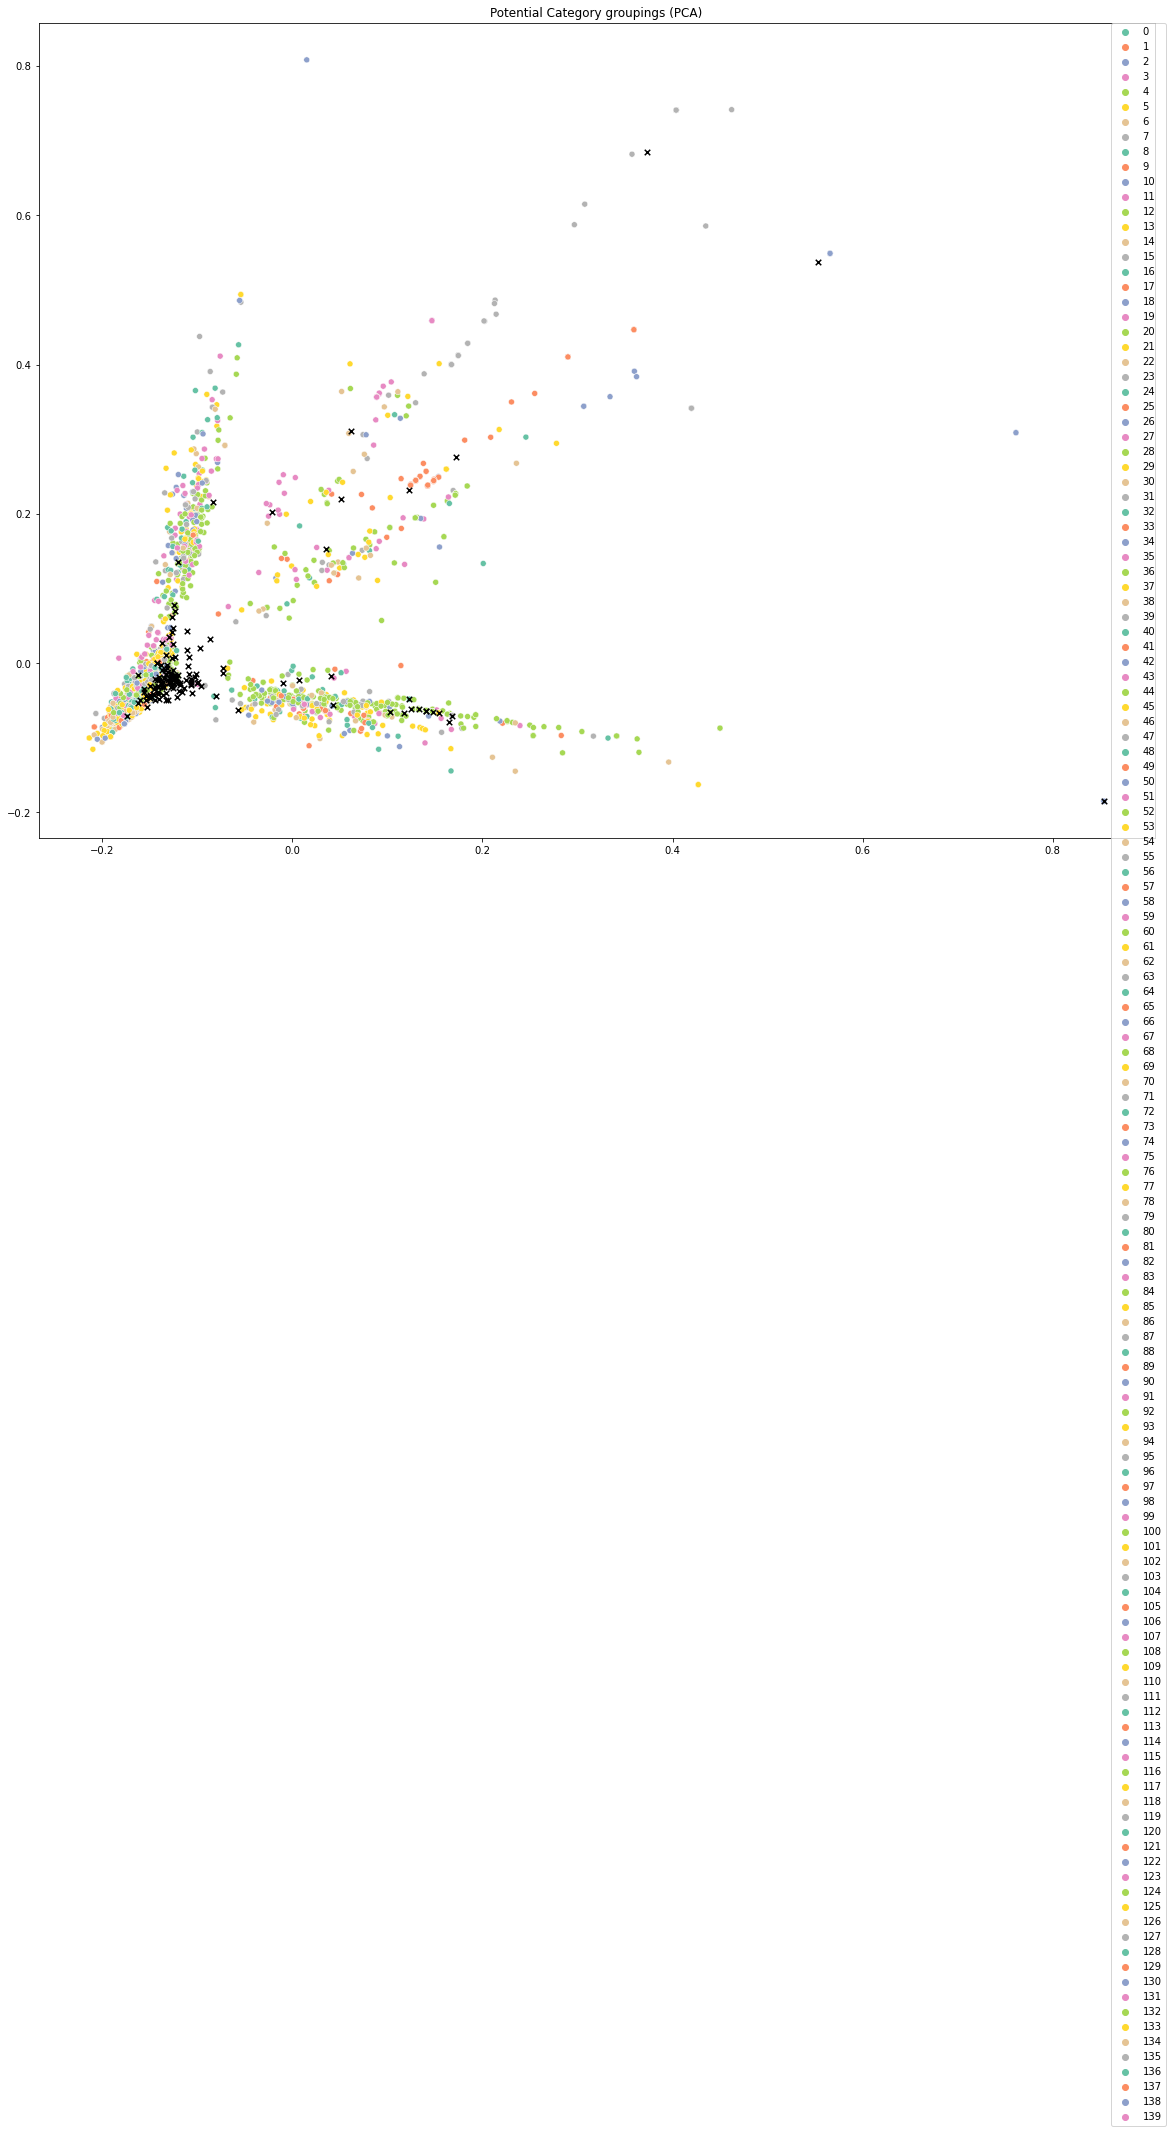

Cluster number:  93

Top bigrams: 
Genie Access,Access -,- SR,SR 2204250050001910 (6)

Titles in the cluster: 
Genie Access - SR 2204250050001910
[ARR] [Sev B] SR-2204250050001910 
Genie Access - SR 2204250050001910 Genie Access - SR 2204170030000336
Genie Access - SR 2204250050001910
Genie Access - SR 2204250050001910
Genie Access - SR 2204250050001910


In [48]:
#categories = None
#Load the data 
def load_data(): 
    df_all = pd.read_csv('Created_Cases - databricks.csv')
    # Take a subset
    return df_all.loc[:, ["Case title","Session Id"]]

df.rename(
    columns=({ 'Case title': 'Case_title', 'Session Id': 'Session_Id'}), 
    inplace=True,
)
df.head()


# Group by Session_ID
grouped_df = df.groupby('Session_Id').agg({'Case_title':list})
# Join all queries in a cases
grouped_df['Case_title'] = grouped_df['Case_title'].apply(lambda x: ' '.join(x))
# Create a list of grouped queries
# for each title. 
queries = list(grouped_df['Case_title'])
print(queries[:10])

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

#vectorizer = StemmedTfidfVectorizer(min_df=1, max_df=0.5, stop_words='english', decode_error='ignore')

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        print("\n Hashing version")
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', non_negative=True,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        print("\n Hashing version normalized")
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       non_negative=False, norm='l2',
                                       binary=False)
else:
    print("\n Stemmed version")
    vectorizer = StemmedTfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(queries)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    lsa = make_pipeline(svd, Normalizer(copy=False))

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()
    ###############################################################################
# Do the actual clustering
# Run elbows in groups of 10
# Limit to a max of the total num cases
ks = [i * 10 if i*10 < len(grouped_df) else len(grouped_df) for i in range(1,15)]
sse = []
 
for k in ks:
    model =  KMeans(
        n_clusters=k, 
        init='k-means++',
        max_iter=100,
        n_init=1)
 
    model.fit(X)
 
    sse.append(model.inertia_)
     
# Plot ks vs SSE
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Sum of Squares Errors (SSE)')
plt.title('Elbow method for optimal K')
plt.axvline(x=120,linestyle='--',c='grey')
plt.axvline(x=133,linestyle='--',c='grey')
plt.xticks(ks)
plt.show()

# silhoutte_score
#https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6
range_n_clusters = [70, 80, 90, 100, 110, 120, 130, 133, 140]
for n_clusters in range_n_clusters:
    #Initializing the clusterer with n_clusters value and a random   generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    #The silhouette_score gives the average value for all the   samples.
    #Calculating number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)
    #Using Silhouette Plot
    #visualizer = SilhouetteVisualizer(clusterer,colors =  'yellowbrick')
    #Fit the data to the visualizer
    #visualizer.fit(X)       
    #Render the figure
    #visualizer.show()
if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=140, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=140, init='k-means++', max_iter=100, n_init=1, verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

# assign predicted clusters
labels = model.labels_
 
# create a dataframe that contains 
# clusters matched to pages and their queries 
mapping = list(zip(labels, grouped_df.index, queries))
clusters = pd.DataFrame(mapping, columns=['cluster','Session_Id','Case_title'])
clusters.head()
#########################################################
#creating bigrams
def find_bigrams(input_list):
    return list(zip(input_list, input_list[1:]))

 
my_dict = {}
n_clusters = clusters['cluster'].unique()
 
# for each cluster
for c in n_clusters: 
    # 1
    asset = clusters[clusters['cluster'] == c] 
    asset = asset['Case_title']
    m_asset = ' '.join(asset)
    # 2
    tokens = word_tokenize(m_asset) 
    # 3
    words = [word for word in tokens if not word in stops]
    # 4
    bigrams = find_bigrams(words)
    bigrams = list(map(' '.join, bigrams))
    # 5
    counts = Counter(bigrams)
    # 6
    most_common = counts.most_common(4)
    most_freq = [bigram[0] for bigram in most_common]
    # 7
    my_dict[c] = ','.join(most_freq)
     
# Add number of article per cluster
val_count = clusters['cluster'].value_counts()
for i in range(len(val_count)):
    my_dict[i] += f' ({val_count[i]})'

    
print(my_dict)

#### Graphics examples

# Dimensionality reduction
# Reduce features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())
 
# Reduce centroids to 2D
reduced_centroids = pca.transform(model.cluster_centers_)
 
print('Tf-IDF feature size: ', X.toarray().shape)
print('PCA feature size: ', reduced_features.shape)
print('Tf-IDF cluster centroids size: ', model.cluster_centers_.shape)
print('PCA centroids size: ', reduced_centroids.shape)

pca_df_scale = pd.DataFrame(reduced_features, columns=['pc1','pc2'])
print(pca.explained_variance_ratio_)
pca_df_scale

import matplotlib.pyplot as plt
import seaborn as sns
 
 
# Plot the individual groupings
# of cases_title
sns.scatterplot(
    x=reduced_features[:,0],
    y=reduced_features[:,1],
    hue=labels,
    palette='Set2')
 
# plot the cluster centroids
plt.scatter(
    reduced_centroids[:, 0],
    reduced_centroids[:,1],
    marker='x',
    s=30,
    c='k'
    )
 
# plot the graph
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.rcParams["figure.figsize"] = (20, 15)
plt.title('Potential Category groupings (PCA)')
plt.show()

show_k = random.randint(0,140)
 
print('Cluster number: ', show_k)
print('\nTop bigrams: ')
print(my_dict[show_k])
print('\nTitles in the cluster: ')
pages = clusters['Case_title'][clusters['cluster'] == show_k]
for page in pages:
    print(page)